# 朴素贝叶斯

In [20]:
# 导入算法包以及数据集
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB#分别为多项式贝叶斯,伯努利贝叶斯,高斯贝叶斯

In [3]:
# 载入数据
iris = datasets.load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris.data, iris.target,random_state=42)

In [5]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train,y_train)
y_pred=multinomial_nb.predict(x_test)
multinomial_nb.score(x_test,y_test)

0.9736842105263158

In [7]:
#查看预测概率
prob = multinomial_nb.predict_proba(x_test)
prob 

array([[0.04563945, 0.50691224, 0.44744831],
       [0.7194873 , 0.18476745, 0.09574525],
       [0.00245054, 0.44678627, 0.55076318],
       [0.03702156, 0.49951334, 0.4634651 ],
       [0.03754883, 0.51130096, 0.4511502 ],
       [0.66004021, 0.21839721, 0.12156258],
       [0.08418255, 0.49566571, 0.42015173],
       [0.01097159, 0.47753953, 0.51148887],
       [0.02561496, 0.49149038, 0.48289466],
       [0.07199228, 0.50058831, 0.42741941],
       [0.0160921 , 0.48693474, 0.49697316],
       [0.68676366, 0.20042674, 0.1128096 ],
       [0.76105125, 0.15791168, 0.08103708],
       [0.68759946, 0.20060157, 0.11179898],
       [0.72574258, 0.17877033, 0.09548709],
       [0.03754829, 0.50532886, 0.45712285],
       [0.00641531, 0.46053389, 0.5330508 ],
       [0.07033451, 0.49837159, 0.4312939 ],
       [0.04278168, 0.49943878, 0.45777954],
       [0.00647878, 0.45756779, 0.53595344],
       [0.64554575, 0.2245957 , 0.12985855],
       [0.02000479, 0.48762578, 0.49236943],
       [0.

## 交叉验证和绘制学习曲线

In [14]:
from sklearn.model_selection import learning_curve #画学习曲线的类
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import ShuffleSplit #设定交叉验证模式的类
import datetime
def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,cv=cv,n_jobs=n_jobs)    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [15]:
title = ["高斯贝叶斯","多项式贝叶斯","伯努利贝叶斯","Logistic"]
model = [GaussianNB(),MultinomialNB(),BernoulliNB(),LR(C=.1,solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

In [18]:
digits = datasets.load_iris()
X, y = digits.data, digits.target

高斯贝叶斯:00:00:249330
多项式贝叶斯:00:00:187498
伯努利贝叶斯:00:00:244963
Logistic:00:00:992921


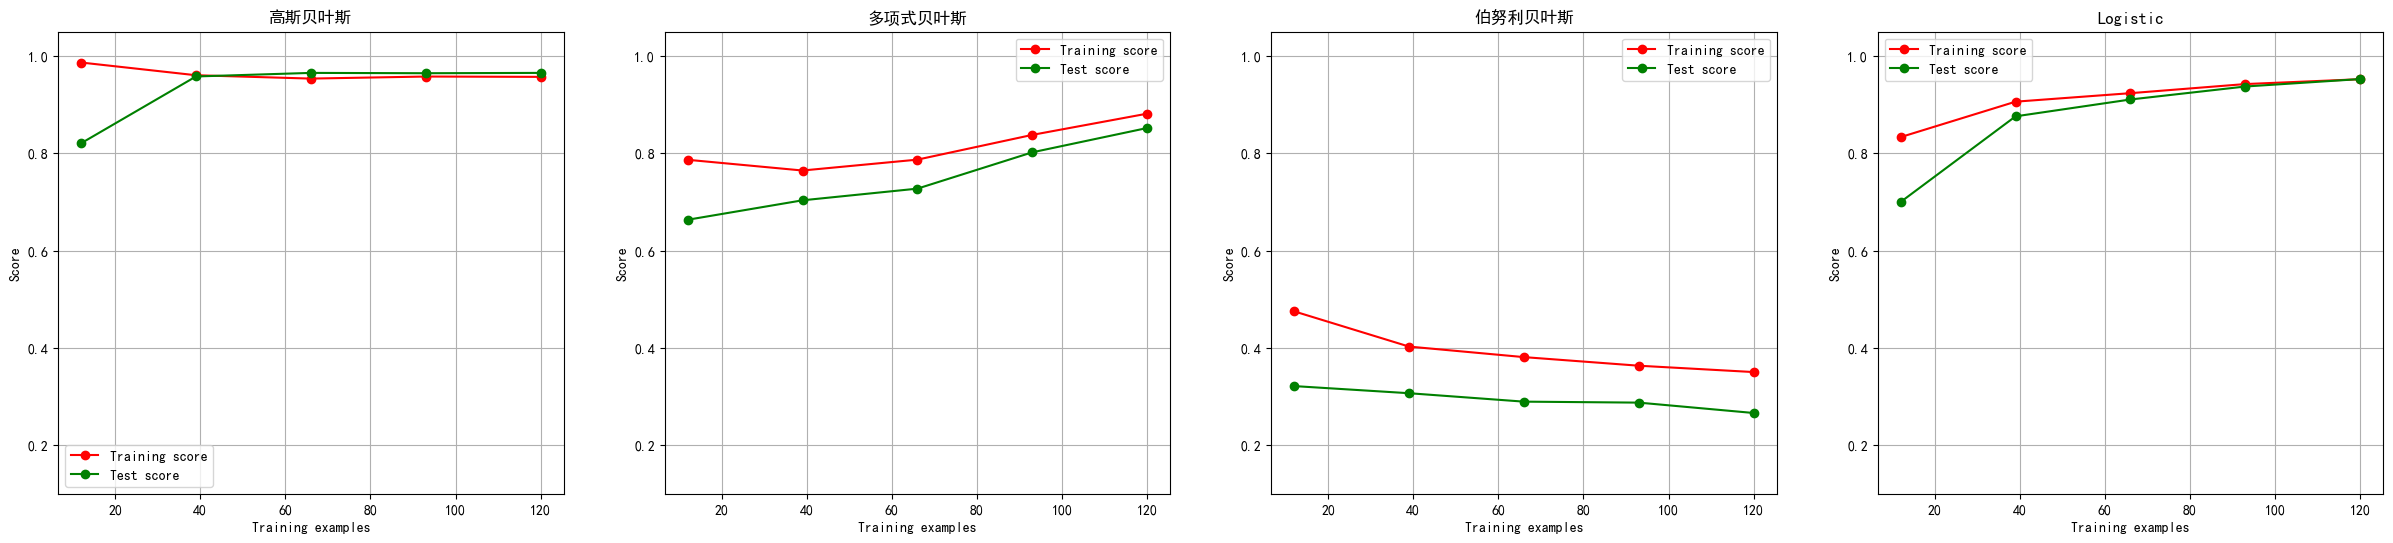

In [24]:
fig, axes = plt.subplots(1,4,figsize=(30,6))
for ind, title_, estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, y,
                        ax=axes[ind], ylim = [0.1, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()